## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
%matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata, study_results, how='left', on=['Mouse ID', 'Mouse ID'])
merged_df.head()

Using matplotlib backend: Qt5Agg


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen

In [3]:
mean = merged_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = merged_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = merged_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stdev = merged_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sterror = merged_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

In [4]:
useful_table = pd.DataFrame({"Mean Tumor Volume":mean,
                              "Median Tumor Volume":median,
                              "Tumor Volume Variance":variance,
                              "Tumor Volume Standard Deviation":stdev,
                              "Tumor Volume Standard Error":sterror})
useful_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [5]:
# Generate a bar plot showing number of data points 
#for each treatment regimen using pandas

Text(0, 0.5, 'Number of Studies')

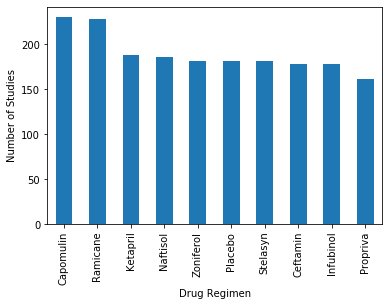

In [6]:
counts = merged_df['Drug Regimen'].value_counts()
counts_bar=counts.plot(kind='bar')
counts_bar.set_xlabel('Drug Regimen')
counts_bar.set_ylabel('Number of Studies')

In [7]:
# Generate a bar plot showing number of data points for 
#each treatment regimen using pyplot
drugs=merged_df.groupby(['Drug Regimen'])
drug_counts=drugs['Drug Regimen'].count()

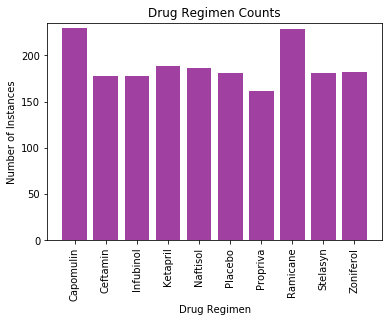

In [8]:
x_axis = np.arange(0, len(counts))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Drug Regimen Counts")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Instances")

plt.ylim(0, max(counts) + 5)

plt.bar(x_axis, drug_counts, facecolor="purple", alpha=0.75, align="center", )
plt.xticks(tick_locations, drugs.indices, rotation=90)
plt.show()

## Pie plots

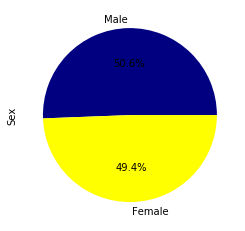

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_counts = merged_df.Sex.value_counts()
gender_pie=gender_counts.plot(kind='pie', colors=['navy', 'yellow'], autopct="%1.1f%%")
plt.show(gender_pie)

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels=merged_df.groupby(['Sex'])
sizes=labels['Sex'].count()
colors=['pink', 'lightskyblue']
explode=[0, 0]

Text(0.5, 1.0, 'Gender')

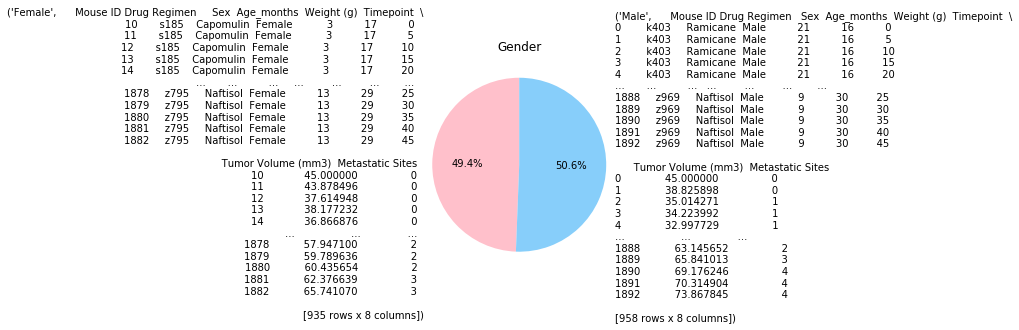

In [11]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=90)
plt.title('Gender')

## Quartiles, outliers and boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of 
#the most promising treatment regimens. Calculate the IQR and 
#quantitatively determine if there are any potential outliers. 
cap_data = merged_df.loc[(merged_df['Drug Regimen']== 'Capomulin')]
cap_max = cap_data.groupby(['Mouse ID'])['Timepoint'].max()
cap_merge = pd.merge(cap_max, cap_data, how='left', on=['Mouse ID', 'Timepoint'])
cap_tumor = cap_merge['Tumor Volume (mm3)']

cap_quartiles = cap_tumor.quantile([.25, .5, .75])
cap_lower = cap_quartiles[0.25]
cap_upper = cap_quartiles[0.75]
cap_iqr = cap_upper - cap_lower

cap_lower_bound = cap_lower-(1.5*cap_iqr)
cap_upper_bound = cap_upper+(1.5*cap_iqr)

print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

cap_outlier_occupancy = (cap_tumor<cap_lower_bound) | (cap_tumor > cap_upper_bound)
cap_outlier_occupancy

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
Name: Tumor Volume (mm3), dtype: bool

In [13]:
# Calculate the final tumor volume of each mouse across four of 
#the most promising treatment regimens. Calculate the IQR and 
#quantitatively determine if there are any potential outliers. 
ram_data = merged_df.loc[(merged_df['Drug Regimen']== 'Ramicane')]
ram_max = ram_data.groupby(['Mouse ID'])['Timepoint'].max()
ram_merge = pd.merge(ram_max, ram_data, how='left', on=['Mouse ID', 'Timepoint'])
ram_tumor = ram_merge['Tumor Volume (mm3)']

ram_quartiles = ram_tumor.quantile([.25, .5, .75])
ram_lower = ram_quartiles[0.25]
ram_upper = ram_quartiles[0.75]
ram_iqr = ram_upper - ram_lower

ram_lower_bound = ram_lower-(1.5*cap_iqr)
ram_upper_bound = ram_upper+(1.5*cap_iqr)

print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

ram_outlier_occupancy = (ram_tumor<ram_lower_bound) | (ram_tumor > ram_upper_bound)
ram_outlier_occupancy

Values below 19.887674359999995 could be outliers.
Values above 52.33180146000001 could be outliers.


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
Name: Tumor Volume (mm3), dtype: bool

In [14]:
# Calculate the final tumor volume of each mouse across four of 
#the most promising treatment regimens. Calculate the IQR and 
#quantitatively determine if there are any potential outliers. 
ket_data = merged_df.loc[(merged_df['Drug Regimen']== 'Ketapril')]
ket_max = ket_data.groupby(['Mouse ID'])['Timepoint'].max()
ket_merge = pd.merge(ket_max, ket_data, how='left', on=['Mouse ID', 'Timepoint'])
ket_tumor = ket_merge['Tumor Volume (mm3)']

ket_quartiles = ket_tumor.quantile([.25, .5, .75])
ket_lower = ket_quartiles[0.25]
ket_upper = ket_quartiles[0.75]
ket_iqr = ket_upper - ket_lower

ket_lower_bound = ket_lower-(1.5*cap_iqr)
ket_upper_bound = ket_upper+(1.5*cap_iqr)

print(f"Values below {ket_lower_bound} could be outliers.")
print(f"Values above {ket_upper_bound} could be outliers.")

ket_outlier_occupancy = (ket_tumor<ket_lower_bound) | (ket_tumor > ket_upper_bound)
ket_outlier_occupancy

Values below 45.04730026 could be outliers.
Values above 81.54504598 could be outliers.


0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
Name: Tumor Volume (mm3), dtype: bool

In [15]:
# Calculate the final tumor volume of each mouse across four of 
#the most promising treatment regimens. Calculate the IQR and 
#quantitatively determine if there are any potential outliers. 
naft_data = merged_df.loc[(merged_df['Drug Regimen']== 'Naftisol')]
naft_max = naft_data.groupby(['Mouse ID'])['Timepoint'].max()
naft_merge = pd.merge(naft_max, naft_data, how='left', on=['Mouse ID', 'Timepoint'])
naft_tumor = naft_merge['Tumor Volume (mm3)']

naft_quartiles = naft_tumor.quantile([.25, .5, .75])
naft_lower = naft_quartiles[0.25]
naft_upper = naft_quartiles[0.75]
naft_iqr = naft_upper - naft_lower

naft_lower_bound = naft_lower-(1.5*cap_iqr)
naft_upper_bound = naft_upper+(1.5*cap_iqr)

print(f"Values below {naft_lower_bound} could be outliers.")
print(f"Values above {naft_upper_bound} could be outliers.")

naft_outlier_occupancy = (naft_tumor<naft_lower_bound) | (naft_tumor > naft_upper_bound)
naft_outlier_occupancy

Values below 40.4067149 could be outliers.
Values above 81.23641595000001 could be outliers.


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
Name: Tumor Volume (mm3), dtype: bool

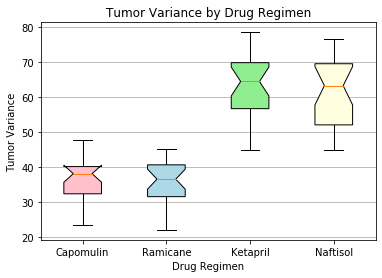

In [16]:
# Generate a box plot of the final tumor volume of each mouse across 
#four regimens of interest

fig, ax = plt.subplots()
all_data=[cap_tumor, ram_tumor, ket_tumor, naft_tumor]
labels=['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol']

# notch shape box plot
boxplot = ax.boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
ax.set_title('Tumor Variance by Drug Regimen')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'lightorange']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
ax.yaxis.grid(True)
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Variance')

plt.show()

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse 
#treated with Capomulin
cap_merge.head(10) #finding list of mouse_ids

In [ ]:
g288_data = cap_data.loc[cap_data['Mouse ID']=='g288']
plt.plot(g288_data['Timepoint'], 
         g288_data['Tumor Volume (mm3)'], 
         color='purple', 
         marker='x')
plt.xlabel('Days')
plt.ylabel('Tumor Volume')
plt.title('G288-Capomulin Tumor Volume by Day')
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume
#for the Capomulin regimen
cap_group = cap_data.groupby(['Mouse ID']).mean()
cap_group
plt.scatter(cap_group['Weight (g)'],
            cap_group['Tumor Volume (mm3)'])
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.title('Mouse Size v. Tumor Volume (Capomulin Regimen)')
plt.show

In [ ]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen
corr_mouse = round(st.pearsonr(cap_group['Weight (g)'],cap_group['Tumor Volume (mm3)'])[0],2)
print(f"The Correlation Coefficient is {corr_mouse}")
weight = cap_group['Weight (g)']
tumor_volume = cap_group['Tumor Volume (mm3)']
cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(weight, tumor_volume)
cap_fit = cap_slope * weight + cap_int
#print(cap_fit)
line_eq = "y = " + str(round(cap_slope,2)) + "x + " + str(round(cap_int,2))
plt.scatter(weight, tumor_volume)
plt.plot(weight, cap_fit,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()